In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 3. Load Dataset
df = pd.read_csv("googleplaystore.csv")
print(df.head())
print(df.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [3]:
# Remove duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Ensure columns are strings before cleaning
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(float)
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # handle "Free" etc.
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Keep only ratings ≤ 5
df = df[df['Rating'] <= 5]

# Drop rows where conversion failed
df.dropna(subset=['Installs','Price','Reviews','Rating'], inplace=True)

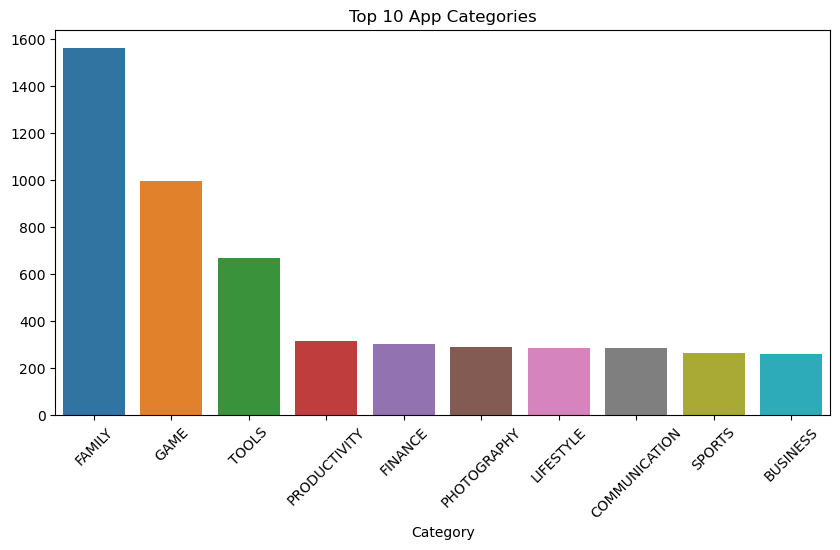

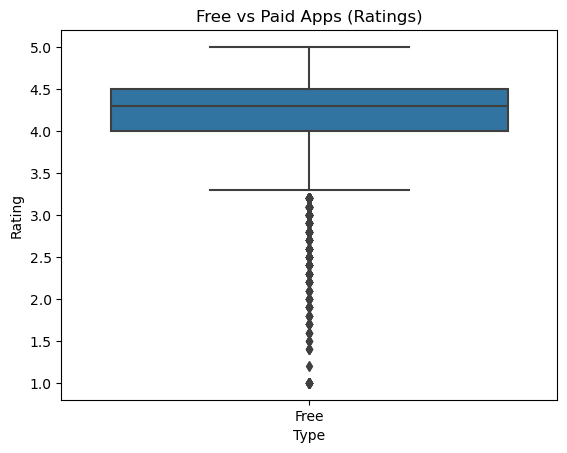

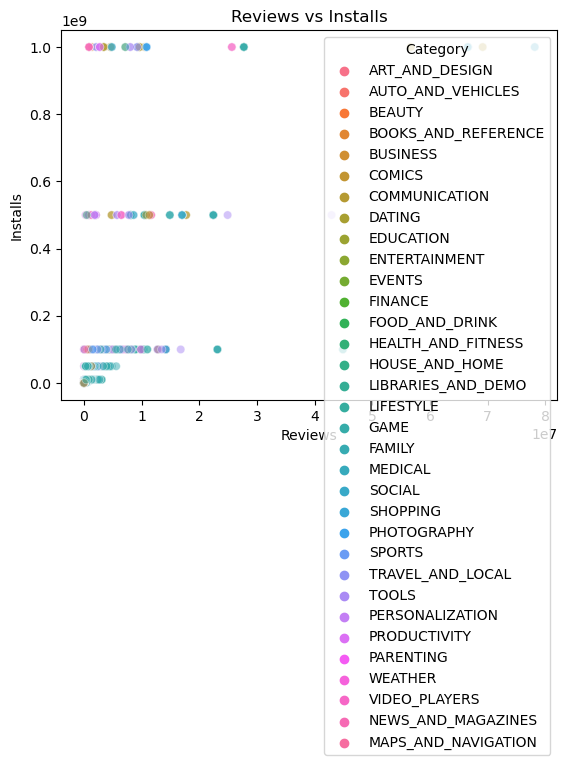

In [4]:
# 5. EDA
plt.figure(figsize=(10,5))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title("Top 10 App Categories")
plt.show()

sns.boxplot(x='Type', y='Rating', data=df)
plt.title("Free vs Paid Apps (Ratings)")
plt.show()

sns.scatterplot(x='Reviews', y='Installs', hue='Category', data=df, alpha=0.5)
plt.title("Reviews vs Installs")
plt.show()


In [5]:
# Clean columns
# Clean Reviews
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean Installs
df['Installs'] = df['Installs'].astype(str).str.replace('+','', regex=False).str.replace(',','', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean Price
df['Price'] = df['Price'].astype(str).str.replace('Free','0', regex=False).str.replace('$','', regex=False).str.replace(',','', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


# Drop rows with missing values
df = df.dropna(subset=['Reviews','Installs','Price','Rating'])

# Features and target
X = df[['Reviews','Installs','Price']]
y = df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.00536638658078914
MSE: 0.30377974340031616


In [6]:
# 6. Machine Learning - Predict Ratings
df['Reviews'] =pd.to_numeric(df['Reviews'],errors='coerce')
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.00536638658078914
MSE: 0.30377974340031616


In [7]:
# 7. Recommendation System
def recommend_apps(category, min_rating=4.0):
    recs = df[(df['Category'] == category) & (df['Rating'] >= min_rating)]
    return recs[['App', 'Category', 'Rating', 'Installs']].sort_values(by='Rating', ascending=False).head(10)

print("📌 Recommended Apps in GAME category:")
print(recommend_apps("GAME"))

📌 Recommended Apps in GAME category:
                                               App Category  Rating  Installs
5822   Flippy Axe : Flip The Knife & Axe Simulator     GAME     5.0     100.0
10776                             Monster Ride Pro     GAME     5.0      10.0
10721                            Mad Dash Fo' Cash     GAME     5.0     100.0
7698                                     CP Trivia     GAME     5.0     100.0
5795                              Axe Champs! Wars     GAME     5.0      50.0
9265                                      EC Mover     GAME     5.0      10.0
6700                              Brick Breaker BR     GAME     5.0       5.0
7402                          Trovami se ci riesci     GAME     5.0      10.0
6495                                     Word Hunt     GAME     4.9     500.0
4975                 Solitaire: Decked Out Ad Free     GAME     4.9  500000.0
